# Example 1 - SGD

This notebook demonstrates **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)** on a convex problem.

---

## Problem Setup
- **Function**:
  $$
  f(x) = \frac{1}{2}x^TQx + b^Tx
  $$
  - $Q$: Positive-definite matrix (size $10 \times 10$).
  - $b$: Random vector of size $10$.

- **Optimal Solution**:
  - $x^* = -Q^{-1}b$
  - $f^* = f(x^*)$

---

## Algorithms

### Gradient Descent (GD)
- **Update Rule**:
  $$
  x_{k+1} = x_k - \eta \nabla f(x_k)
  $$
- **Step Size**:
  $$
  \eta = 0.1
  $$

---

### Stochastic Gradient Descent (SGD)

#### Constant Stepsize
- **Update Rule**:
  $$
  x_{k+1} = x_k - \eta \nabla f_i(x_k)
  $$
- **Step Size**:
  $$
  \eta = 0.1
  $$

#### Decaying Stepsize
- **Update Rule**:
  $$
  x_{k+1} = x_k - \frac{\eta}{\sqrt{k}} \nabla f_i(x_k)
  $$
- **Step Size**:
  $$
  \eta_k = \frac{\eta}{\sqrt{k}}
  $$

---

### Efficiency of SGD
- **SGD** computes updates using only a subset of the data, making it approximately **5 to 10 times faster** than GD.


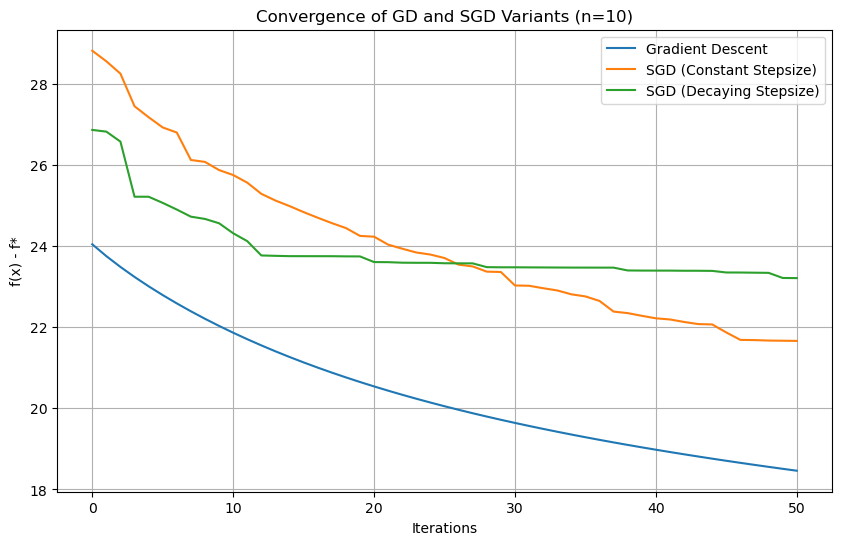

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define a convex function
def f(x, Q, b):
    return 0.5 * x.T @ Q @ x + b.T @ x

def grad_f(x, Q, b):
    return Q @ x + b

# Generate convex problem
def generate_convex_problem(n=10, seed=0):
    np.random.seed(seed)
    Q = np.random.rand(n, n)
    Q = Q.T @ Q  # Positive definite matrix
    b = np.random.randn(n)
    return Q, b

# Gradient Descent Implementation
def gradient_descent(Q, b, lr, iterations=100, x_init=None):
    if x_init is None:
        x_init = np.random.randn(Q.shape[0])  # Initialize randomly
    x = x_init
    f_values = [f(x, Q, b)]
    for _ in range(iterations):
        grad = grad_f(x, Q, b)
        x -= lr * grad
        f_values.append(f(x, Q, b))
    return f_values

# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(Q, b, lr, iterations=100, x_init=None, decay=False):
    if x_init is None:
        x_init = np.random.randn(Q.shape[0])  # Initialize randomly
    x = x_init
    n = Q.shape[0]
    f_values = [f(x, Q, b)]
    for k in range(1, iterations + 1):
        i = np.random.randint(0, n)  # Randomly sample index
        grad = Q[i, :] @ x + b[i]  # Partial gradient
        step_size = lr / np.sqrt(k) if decay else lr  # Decaying step size
        x[i] -= step_size * grad
        f_values.append(f(x, Q, b))
    return f_values

# Generate problem
Q, b = generate_convex_problem(n=10, seed=42)
f_star = f(np.linalg.solve(Q, -b), Q, b)  # Optimal function value

# Run algorithms
gd_values = gradient_descent(Q, b, lr=0.01, iterations=50)
sgd_constant_values = stochastic_gradient_descent(Q, b, lr=0.01, iterations=50, decay=False)
sgd_decay_values = stochastic_gradient_descent(Q, b, lr=0.1, iterations=50, decay=True)

# Adjust values for f(x) - f*
gd_adjusted = [val - f_star for val in gd_values]
sgd_constant_adjusted = [val - f_star for val in sgd_constant_values]
sgd_decay_adjusted = [val - f_star for val in sgd_decay_values]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(gd_adjusted, label="Gradient Descent")
plt.plot(sgd_constant_adjusted, label="SGD (Constant Stepsize)")
plt.plot(sgd_decay_adjusted, label="SGD (Decaying Stepsize)")
plt.xlabel("Iterations")
plt.ylabel("f(x) - f*")
plt.legend()
plt.grid()
plt.title("Convergence of GD and SGD Variants (n=10)")
plt.show()
